# Tutorial ajuste de datos


## Prof. Dr. Alejandro Velez Zea


En este Notebook de Jupyter les hare una demostración de como ajustar una función definida a datos experimentales, y luego testear la bondad del ajuste resultante. Para este propósito, realizaremos un ajuste para una función gaussiana.

### 1. Generar función de ajuste
Primero definimos la función modelo que trataremos de ajustar a los datos experimentales. En este caso la función será una Gaussiana. Para definir esta función, importaremos de numpy las funciones exp, de exponencial, linspace para generar el dominio de la funcion gaussiana y random para generar números aleatorios. Los argumentos de la gaussiana serán x, que es el dominio, amp, la amplitud, cen, donde está centrada, y finalmente anc, que es el ancho. Estos últimos valores serán los que buscaremos por medio del ajuste.

In [1]:
from numpy import exp, linspace, random, std, mean, log10, ceil, diag, sqrt

def gaussiana(x, amp, cen,anc):
    return amp*exp(-(x-cen)**2/anc)


### 2. Cargar (o generar) los datos a ajustar.
En este caso, no usaremos datos experimentales si no que los generaremos datos por medio de la funcion gaussiana, añadiendo ruido aleatorio por medio de la funcion random.


In [2]:


x=linspace(-10,10,101)
y=gaussiana(x,4,1,15)+(random.normal(0,0.4,x.size))

Grafiquemos los datos generados

/home/juan27/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/tmp/ipykernel_43938/3987006522.py:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x,y,'-o',linestyle='none',label='Datos Experimentales')


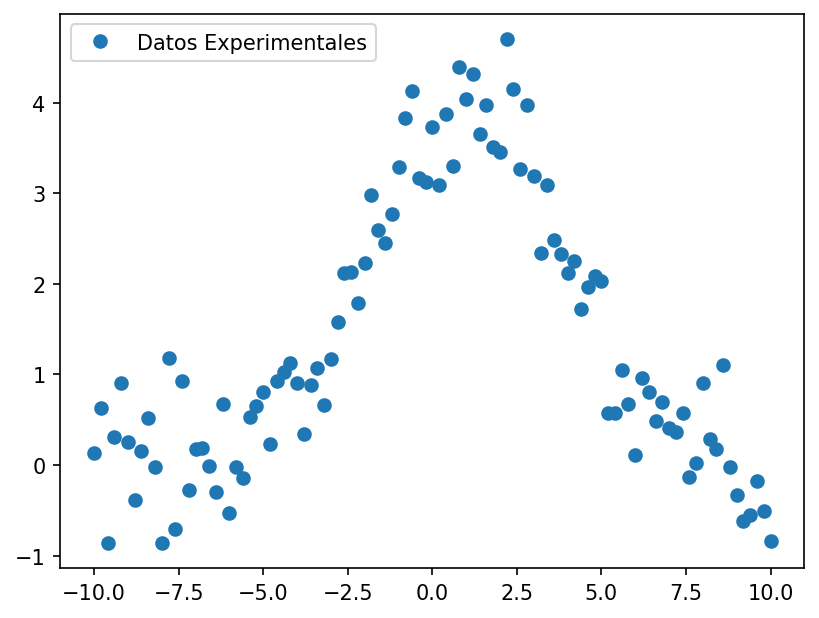

In [3]:
import matplotlib.pyplot  as plt
plt.figure(dpi=150)
plt.plot(x,y,'-o',linestyle='none',label='Datos Experimentales')
plt.legend(loc='best')

### 3. Hallar parámetros ajustados
Ahora inicializamos la funcion que usaremos para el ajuste, que es llamada scipy.optimize.curve_fit. Para ello creamos un array con valores aproximados para los argumentos de la gausiana que queremos ajustar, en este caso [amp,cen,anc]. Observe los datos experimentales y trate de ofrecer unos valores iniciales plausibles, de lo contrario puede que el ajuste no converge a una solución razonable.


In [4]:
from scipy.optimize import curve_fit

val_ini = [1,0,1]
mej_val, cov = curve_fit(gaussiana,x,y,val_ini)
print('mej_val: {}'.format(mej_val))
print(cov)

mej_val: [ 4.02264244  1.02750787 15.52094605]
[[ 1.31703387e-02 -8.46232391e-07 -6.77742386e-02]
 [-8.46232391e-07  8.42052698e-03  1.43535189e-05]
 [-6.77742386e-02  1.43535189e-05  1.04600388e+00]]


Ahora veamos el que nos dice la matriz de covarianza, calculada por curve fit

In [5]:
perr = sqrt(diag(cov))
print(perr)

[0.1147621  0.09176343 1.02274331]


Los valores obtenidos de mej_val, representan los argumentos que mejor ajustan la funcion gaussiana a los datos que usamos, y los valores de perr sus respectivas incertidumbres a una desviacion estandard. Grafiquemos el ajuste contra los datos experimentales.

/tmp/ipykernel_43938/596275515.py:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x,y,'-o',linestyle='none',label='Datos Experimentales')


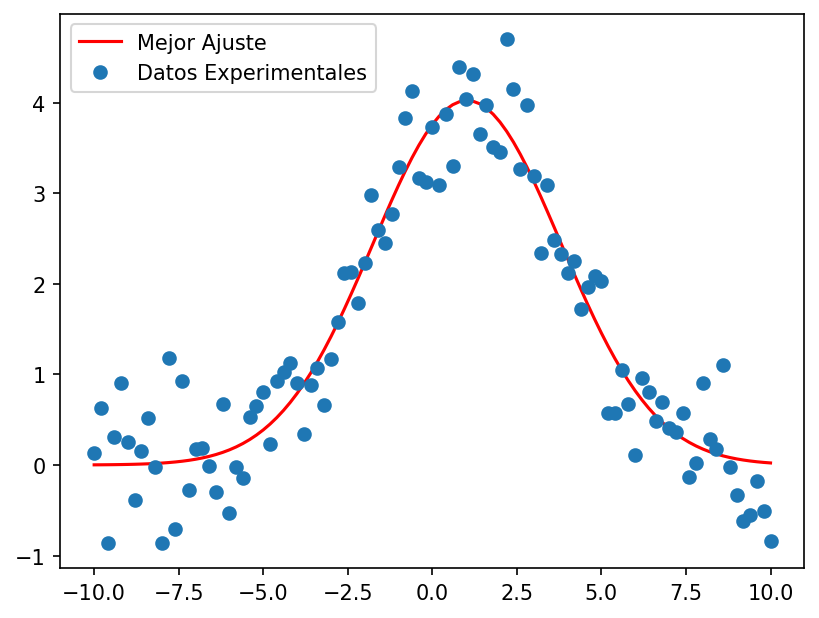

In [6]:
yaj=gaussiana(x,mej_val[0],mej_val[1],mej_val[2])
plt.figure(dpi=150)
plt.plot(x,yaj,'r',label='Mejor Ajuste')
plt.plot(x,y,'-o',linestyle='none',label='Datos Experimentales')
plt.legend(loc='best')

### 4. Determinar la bondad del ajuste.

Para obtener chi cuadrado, debemos dividir nuestros datos en intervalos o "bins", cada uno representando un posible rango de valores de los datos. La cantidad de datos individuales en cada intervalo representa las frecuencias de ocurrencia para ese rango de valores. Para esta División, podemos usar la funcion de matplotlib hist. Esta funcion usa los datos de entrada, y realiza un histograma de estos dividiéndolos en un numero definido de intervalos. El número de intervalos lo debemos elegir de manera que no haya ninguna con menos de 5 cuentas. Este valor será llamado nbin. También se debe elegir el rango de los intervalos, de modo que cubran todo el rango de los datos. A este rango lo llamaremos yran.

Este proceso lo hacemos para los datos experimentales y los datos de la curva de ajuste obtenida. Con las frecuencias de estos dos sets, podemos calcular chi cuadrada con la funcion chi_square. El número de intervalos usados será nuestro número de grados de libertad para determinar si se cumple la hipótesis (si la curva de ajuste corresponde a los datos experimentales).

7
-0.8634661010009874 4.699151893102256
[-0.8634661  -0.06880639  0.72585333  1.52051304  2.31517275  3.10983247
  3.90449218  4.69915189]
[-0.8634661  -0.06880639  0.72585333  1.52051304  2.31517275  3.10983247
  3.90449218  4.69915189]
[15. 30. 16. 11.  9. 12.  8.]
[ 0. 50. 12. 10.  9. 13.  7.]
Chi cuadrado = inf


/tmp/ipykernel_43938/2341021370.py:27: RuntimeWarning: divide by zero encountered in divide
  return sum(((dathistexp-dathistaj)**2)/(dathistaj))


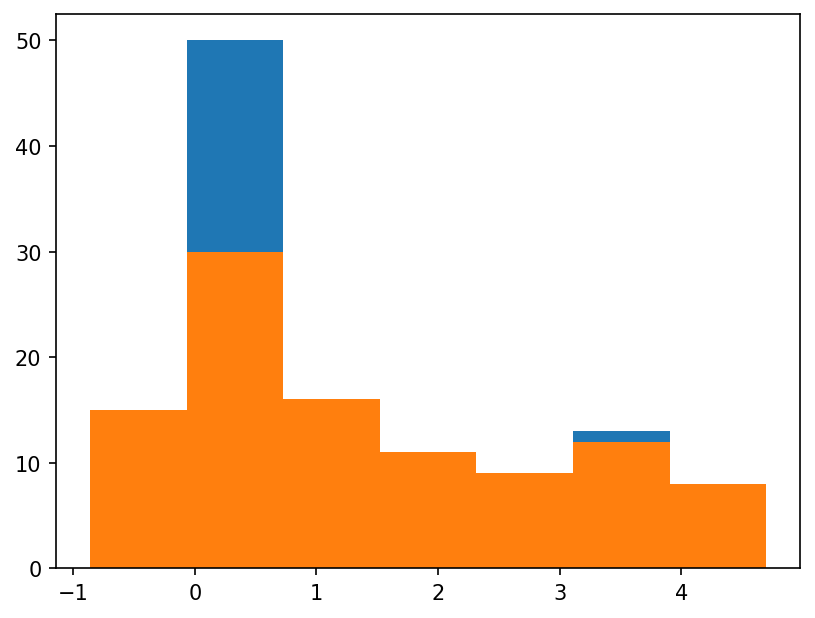

In [7]:
#Definimos el numero de intervalos para el test de chi cuadrado usando el criterio de Sturges
nbin=int(1+3.322*log10(101))
print(nbin)
#Definimos un rango minimo y maximo comun para los datos obtenidos experimentamente y por medio del ajuste
ymin1=min(y)
ymin2=min(yaj)
if ymin1>ymin2:
    ymin=ymin2
else:
    ymin=ymin1

ymax1=max(y)
ymax2=max(yaj)
if ymax1>ymax2:
    ymax=ymax1
else:
    ymax=ymax2
print(ymin, ymax)
#Se hace el histograma dividiendo el rango definido arriba entre el numero de intervalos calculado previamente. Esto lo hace la funcion plt.hist automaticamente.
plt.figure(dpi=150)
[naj,baj,paj]=plt.hist(yaj,nbin,range=(ymin,ymax))
[n,b,p]=plt.hist(y,nbin,range=(ymin,ymax))
print(b)
print(baj)
print(n)
def chi_sqr(dathistexp,dathistaj):
    return sum(((dathistexp-dathistaj)**2)/(dathistaj))

print(naj)
print('Chi cuadrado =',chi_sqr(n,naj))

Comparemos el valor obtenido de chi cuadrado con la tabla de p-values a continuación  

In [8]:
from PIL import Image as im
import numpy as np
a=im.open('Imagen2.jpg')
a=np.asarray(a)
plt.figure(dpi=200)
plt.axis('off')
plt.imshow(a)

FileNotFoundError: [Errno 2] No such file or directory: 'Imagen2.jpg'

Tenemos 7-1-3 grados de libertad, por que usamos 7 intervalos. De aquí se sigue que una probabilidad de 0.05 requerimos un chi cuadrado de 7.81. El valor obtenido es menor, por lo que no podemos rechazar el ajuste.!

Para calcular el coeficiente de determinación R^2, no es necesario hacer histogramas, simplemente se procede a calcular con la funcion r_sqr que definimos a continuación.

In [ ]:
def r_sqr(datexp,dataj):
    return 1-sum((datexp-dataj)**2)/sum((datexp-mean(datexp))**2)

print('R^2 = ', r_sqr(y,yaj))


R^2 =  0.7404768990535762


El valor aqui obtenido es muy cercano a 1, lo que tambien verifica la bondad del ajuste obtenido.

Veamos que ocurre al graficar la grafica de residuos

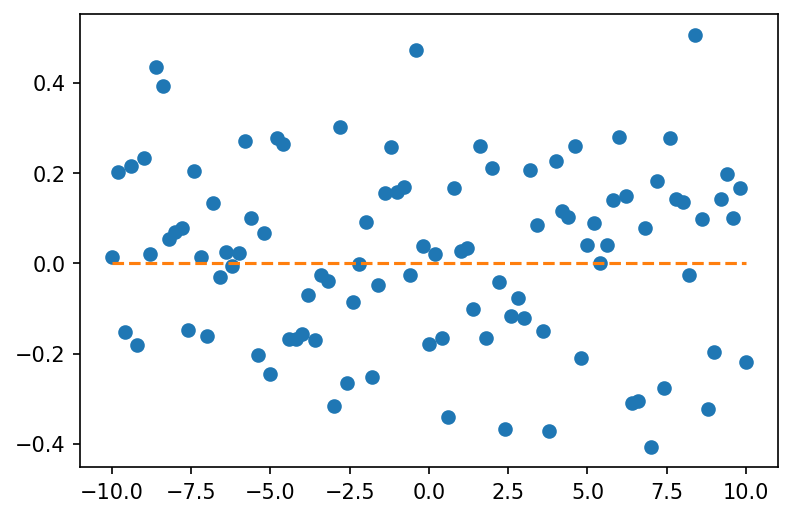

In [ ]:
yres=yaj-y
yz=np.zeros(x.shape)
plt.figure(dpi=150)
plt.plot(x,yres,'-o',linestyle='none')
plt.plot(x,yz,linestyle='--')

Los residuos estan distribuidos aleatoriamente alrededor de 0, lo que indica un ajuste adecuado.